In [55]:
# Импортируем библиотеки

import pandas as pd

from pandas import Series
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc, roc_auc_score, roc_curve

In [56]:
import warnings
warnings.filterwarnings("ignore")

In [57]:
train = pd.read_csv('train_credit.csv')
test= pd.read_csv('test_credit.csv')

In [58]:
#Посмотрим структуру данных
train.sample(5)

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,default
39978,36550,12FEB2014,SCH,F,37,Y,N,0,0,-2.275369,0,40,1,2,15000,1,3,N,0
30534,49082,26FEB2014,SCH,F,60,Y,N,0,0,-2.109849,0,40,2,3,35000,1,4,N,0
4448,79141,27MAR2014,SCH,F,43,N,N,0,0,-2.665216,2,40,1,2,30000,1,4,N,0
28685,15501,22JAN2014,SCH,M,39,Y,N,0,0,-1.432522,1,50,1,2,35000,1,3,N,0
32324,5585,12JAN2014,SCH,F,30,N,N,0,0,-1.449295,0,50,1,2,30000,1,2,N,0


In [59]:
#Общая информация о датасетах
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73799 entries, 0 to 73798
Data columns (total 19 columns):
client_id           73799 non-null int64
app_date            73799 non-null object
education           73492 non-null object
sex                 73799 non-null object
age                 73799 non-null int64
car                 73799 non-null object
car_type            73799 non-null object
decline_app_cnt     73799 non-null int64
good_work           73799 non-null int64
score_bki           73799 non-null float64
bki_request_cnt     73799 non-null int64
region_rating       73799 non-null int64
home_address        73799 non-null int64
work_address        73799 non-null int64
income              73799 non-null int64
sna                 73799 non-null int64
first_time          73799 non-null int64
foreign_passport    73799 non-null object
default             73799 non-null int64
dtypes: float64(1), int64(12), object(6)
memory usage: 10.7+ MB


In [60]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36349 entries, 0 to 36348
Data columns (total 18 columns):
client_id           36349 non-null int64
app_date            36349 non-null object
education           36178 non-null object
sex                 36349 non-null object
age                 36349 non-null int64
car                 36349 non-null object
car_type            36349 non-null object
decline_app_cnt     36349 non-null int64
good_work           36349 non-null int64
score_bki           36349 non-null float64
bki_request_cnt     36349 non-null int64
region_rating       36349 non-null int64
home_address        36349 non-null int64
work_address        36349 non-null int64
income              36349 non-null int64
sna                 36349 non-null int64
first_time          36349 non-null int64
foreign_passport    36349 non-null object
dtypes: float64(1), int64(11), object(6)
memory usage: 5.0+ MB


In [61]:
# Оба датасета имеют пропуски в признаке "Education" - придется подумать, что с ним делать

In [62]:
# Список колонок-признаков по двум датасетам
train.columns, test.columns

(Index(['client_id', 'app_date', 'education', 'sex', 'age', 'car', 'car_type',
        'decline_app_cnt', 'good_work', 'score_bki', 'bki_request_cnt',
        'region_rating', 'home_address', 'work_address', 'income', 'sna',
        'first_time', 'foreign_passport', 'default'],
       dtype='object'),
 Index(['client_id', 'app_date', 'education', 'sex', 'age', 'car', 'car_type',
        'decline_app_cnt', 'good_work', 'score_bki', 'bki_request_cnt',
        'region_rating', 'home_address', 'work_address', 'income', 'sna',
        'first_time', 'foreign_passport'],
       dtype='object'))

Описания полей датасета

- client_id - идентификатор клиента (non-usefull feature)
- education - уровень образования (word_category)
- sex - пол заемщика (word_binary)
- age - возраст заемщика (quantative)
- car - флаг наличия автомобиля (num_binary)
- car_type - флаг автомобиля иномарки (num_binary)
- decline_app_cnt - количество отказанных прошлых заявок (quantative)
- good_work - флаг наличия “хорошей” работы (num_binary)
- bki_request_cnt - количество запросов в БКИ (quantative)
- home_address - категоризатор домашнего адреса (num_category)
- work_address - категоризатор рабочего адреса (num_category)
- income - доход заемщика (quantative)
- foreign_passport - наличие загранпаспорта (binary)
- sna - связь заемщика с клиентами банка (num_category)
- first_time - давность наличия информации о заемщике (num_category)
- score_bki - скоринговый балл по данным из БКИ (quantative)
- region_rating - рейтинг региона (num_category)
- app_date - дата подачи заявки (str_quantative)
- default - флаг дефолта по кредиту (binary)

In [63]:
# Проверим наличие пропусков в датасете
train.isnull().sum()

client_id             0
app_date              0
education           307
sex                   0
age                   0
car                   0
car_type              0
decline_app_cnt       0
good_work             0
score_bki             0
bki_request_cnt       0
region_rating         0
home_address          0
work_address          0
income                0
sna                   0
first_time            0
foreign_passport      0
default               0
dtype: int64

In [64]:
test.isnull().sum()

client_id             0
app_date              0
education           171
sex                   0
age                   0
car                   0
car_type              0
decline_app_cnt       0
good_work             0
score_bki             0
bki_request_cnt       0
region_rating         0
home_address          0
work_address          0
income                0
sna                   0
first_time            0
foreign_passport      0
dtype: int64

#### Попробуем разобраться с признаком Education

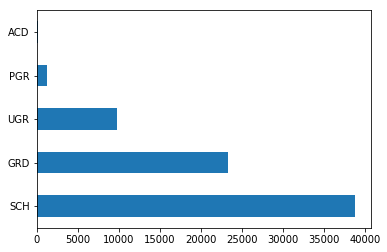

In [65]:
train['education'].value_counts().plot.barh()

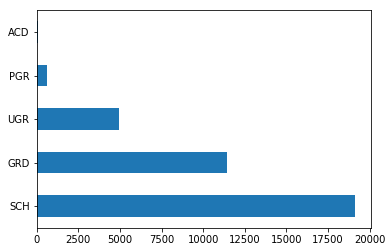

In [66]:
test['education'].value_counts().plot.barh()

Справка по категориям обучения

    PGR = Postgraduate Research students are studying for a Masters or Doctoral qualification mostly by research
    UGR = Undergraduate students who are studying for a first degree, UG Diploma or Certificate.
    GRD = A graduate student, bachelor’s degree and is pursuing additional education in a specific field
    SCH = School only
    ACD = Accredited college degree

##### ВЫВОД:

Структура заемщиков такова, что наиболее часто обращаются люди, имеющие за спиной школьное образование.
Поскольку выявить настоящее образование пропущенных клиентов не представляется возможным, используем наиболее часто встречающееся образование для заполнения пропусков

In [67]:
#Заполним пропуски значением, которое встречается чаще всего

import collections

c_1 = collections.Counter(train['education'])
c_2 = collections.Counter(test['education'])

train['education'].fillna(c_1.most_common()[0][0], inplace=True)
test['education'].fillna(c_2.most_common()[0][0], inplace=True)

In [68]:
#Убедимся, что пропусков не осталось:
train.isnull().sum()

client_id           0
app_date            0
education           0
sex                 0
age                 0
car                 0
car_type            0
decline_app_cnt     0
good_work           0
score_bki           0
bki_request_cnt     0
region_rating       0
home_address        0
work_address        0
income              0
sna                 0
first_time          0
foreign_passport    0
default             0
dtype: int64

In [69]:
test.isnull().sum()

client_id           0
app_date            0
education           0
sex                 0
age                 0
car                 0
car_type            0
decline_app_cnt     0
good_work           0
score_bki           0
bki_request_cnt     0
region_rating       0
home_address        0
work_address        0
income              0
sna                 0
first_time          0
foreign_passport    0
dtype: int64

#### Поработаем с признаком времени, обычно можно извлечь интересную информацию

In [70]:
# Проверим признак app_date:
train.app_date.sample(5)

55080    15FEB2014
9286     13FEB2014
65067    13JAN2014
26137    06APR2014
2145     22APR2014
Name: app_date, dtype: object

In [71]:
test.app_date.sample(5)

12909    18JAN2014
18075    15APR2014
36051    29JAN2014
34990    18JAN2014
26243    27FEB2014
Name: app_date, dtype: object

In [72]:
# Преобразуем STR время в формат времени datetime:

train.app_date = pd.to_datetime(train.app_date)
test.app_date = pd.to_datetime(test.app_date)
print(train.app_date.sample(2))
print(test.app_date.sample(2))

46583   2014-01-26
58170   2014-03-19
Name: app_date, dtype: datetime64[ns]
24162   2014-02-09
19710   2014-02-01
Name: app_date, dtype: datetime64[ns]


#### На основе признака app_date создадим новые признаки

In [73]:
#Добавим признак - дней с момента подачи:

train['days_passed'] = (pd.to_datetime('today') - train.app_date).dt.days
test['days_passed'] = (pd.to_datetime('today') - test.app_date).dt.days

In [74]:
train['days_passed'].sample(2)

30561    2363
71135    2342
Name: days_passed, dtype: int64

In [75]:
# Добавим признак - Месяц подачи заявки

train['app_date_month'] = train.app_date.dt.month
test['app_date_month'] = test.app_date.dt.month

In [76]:
train['app_date_month'].sample(2)

51099    2
770      3
Name: app_date_month, dtype: int64

In [77]:
# Добавим признак - день недели подачи заявки (есть одна мыслишка на будущее...)

train['app_date_weekday'] = train.app_date.dt.weekday
test['app_date_weekday'] = test.app_date.dt.weekday

In [78]:
train['app_date_weekday'].sample(2)

63110    0
52290    5
Name: app_date_weekday, dtype: int64

In [79]:
pd.set_option('max_columns', None)
train.sample(2)

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,default,days_passed,app_date_month,app_date_weekday
47894,84117,2014-04-01,UGR,F,60,N,N,0,0,-2.353052,0,50,2,3,15000,1,4,N,0,2359,4,1
58525,68880,2014-03-17,UGR,F,43,N,N,0,0,-1.329667,2,40,1,2,16550,4,1,N,1,2374,3,0


#### Cгруппируем все признаки в категории по типу их обработки (категориальные, бинарные, числовые)

In [80]:
bin_cols = ['sex', 'car', 'car_type', 'good_work', 'foreign_passport']
cat_cols = ['education', 'region_rating','home_address', 'work_address', 'sna', 'first_time', 'app_date_month', 'app_date_weekday']
num_cols = ['age', 'decline_app_cnt', 'score_bki', 'bki_request_cnt', 'income','days_passed']

## Визуализация

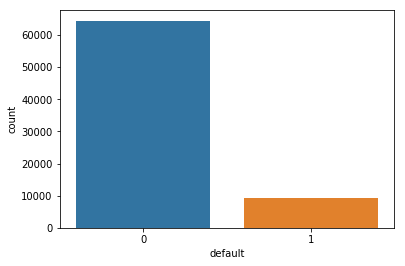

In [81]:
sns.countplot(train['default'])

##### ВЫВОД:

Выборка гласит, что положительных заявок больше, чем отклоненных.
Довольно странная ситуация, но посмотрим, что мы увидим дальше

Построим графики распределения численных переменных

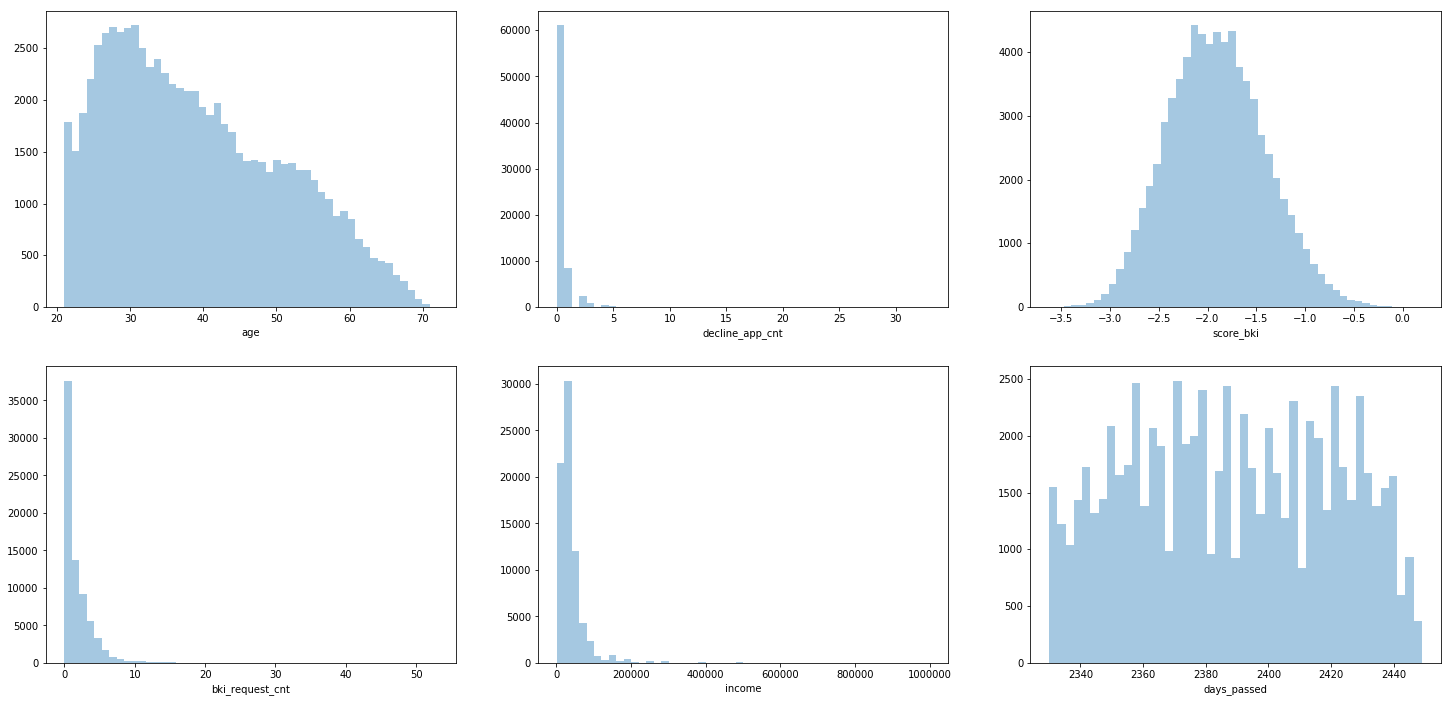

In [82]:
fig, axes = plt.subplots(2, 3, figsize=(25,12))
for col, i in zip(num_cols, range(7)):
    sns.distplot(train[col], kde=False, ax=axes.flat[i])

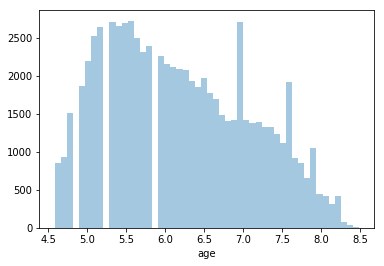

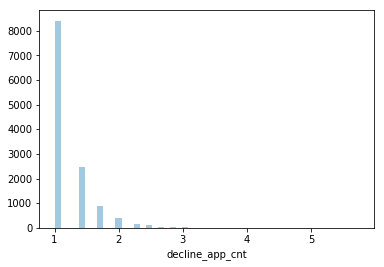

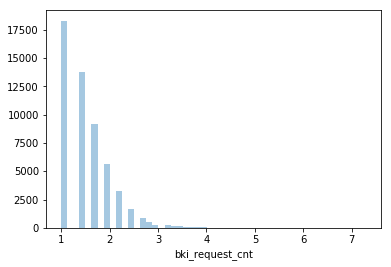

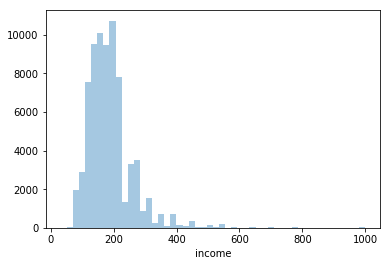

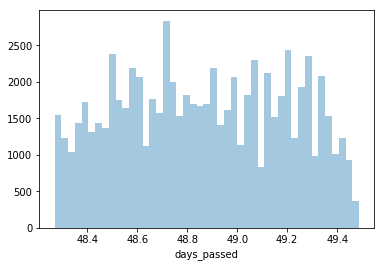

In [83]:
# Прологарифмируем переменные, хвост которых явно смещен влево

num_cols_log = ['age', 'decline_app_cnt', 'bki_request_cnt', 'income', 'days_passed']
for i in num_cols_log:
    train[i] = np.sqrt(train[i])
    plt.figure(figsize=(6,4))
    sns.distplot(train[i][train[i] > 0].dropna(), kde = False, rug=False)
    plt.show()

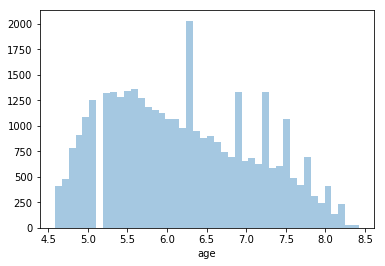

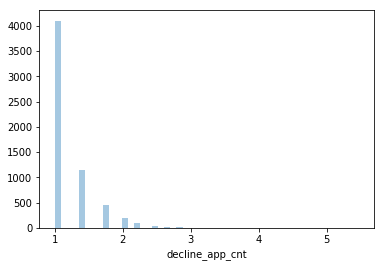

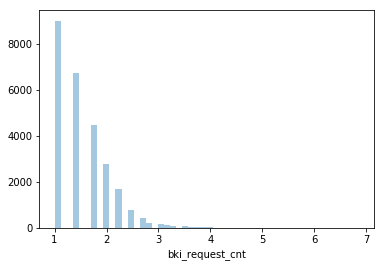

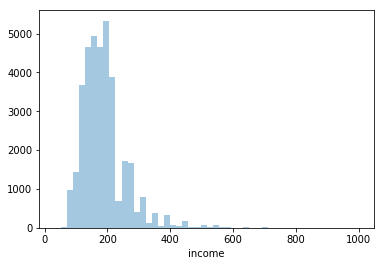

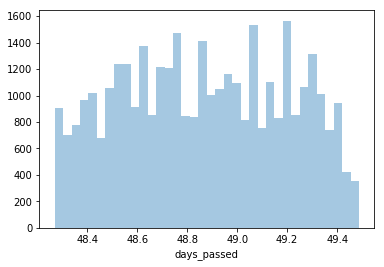

In [84]:
for i in num_cols_log:
    test[i] = np.sqrt(test[i])
    plt.figure(figsize=(6,4))
    sns.distplot(test[i][test[i] > 0].dropna(), kde = False, rug=False)
    plt.show()

Построим матрицу корреляций

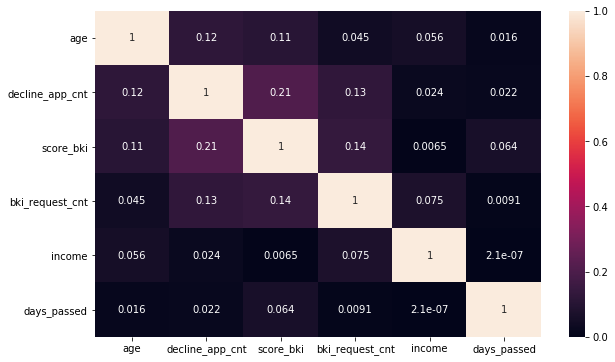

In [85]:
# Построим матрицу корреляций 

plt.figure(figsize=(10,6))
sns.heatmap(train[num_cols].corr().abs(), vmin=0, vmax=1, annot=True)

##### ВЫВОД:

Значительной корреляции между признаками не наблюдается

#### Проанализируем боксплоты для численных переменных num_cols

In [86]:
num_cols

['age',
 'decline_app_cnt',
 'score_bki',
 'bki_request_cnt',
 'income',
 'days_passed']

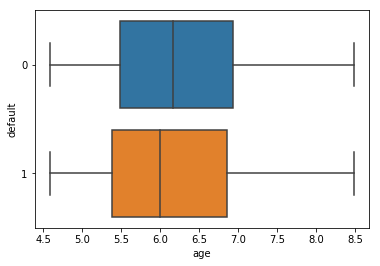

In [87]:
sns.boxplot(y=train.default, x=train.age, orient = 'h')

##### ВЫВОД:

Дефолтные клиенты в среднем младше. Но в целом значительных отличий между OK/NG заявками нет.

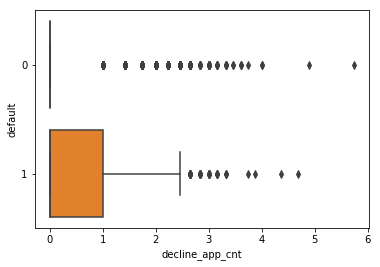

In [88]:
sns.boxplot(y=train.default, x=train.decline_app_cnt, orient = 'h')

##### ВЫВОД:
    
А вот тут интересно - у дефолтных клиентов количество отклоненных заявок значительно больше.
Более того, недефолтные клиенты по этому показателю находяся около нуля

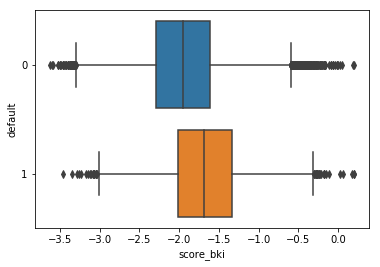

In [89]:
sns.boxplot(y=train.default, x=train.score_bki, orient = 'h')

##### ВЫВОД:

Очень странно - скоринговый балл по данным из БКИ говорит нам, что у дефолтных клиентов балл выше, при этом в нашем банке им чаще отказывают. Это явное нарушение логики.
Т.к. все значения лежат ниже 0 и при этом нормально распределены, полагаю, что банк самостоятельно обработал данный признак.

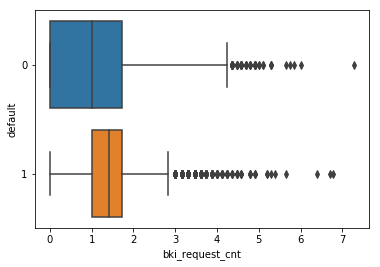

In [90]:
sns.boxplot(y=train.default, x=train.bki_request_cnt, orient = 'h')

##### ВЫВОД:

Количество запросов в БКИ по дефолтным клиентам больше.

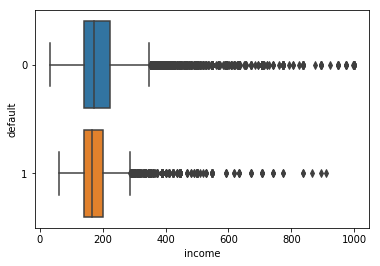

In [91]:
sns.boxplot(y=train.default, x=train.income, orient = 'h')

##### ВЫВОД

Доход недефолтных клиентов в среднем ожидаемо выше, чем доход дефолтных.
Но немного странно, что присутствует много выбросов за пределами квартилей, некоторые доходы уходят далеко вверх

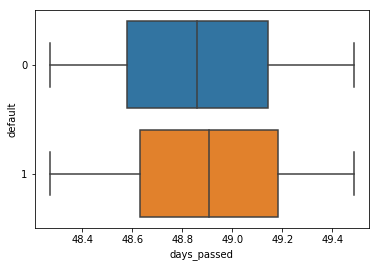

In [92]:
sns.boxplot(y=train.default, x=train.days_passed, orient = 'h')

##### ВЫВОД:
    
Время с подачи заявки у дефолтных клиентов больше. Однако данный показатель не демонстрирует нам принципиальных различий
для одобренных/отклоненных заявок.

## Преобразование бинарных и категориальных переменных

In [93]:
#Преобразуем бинарные переменные с помощью класса LabelEncoder
label_encoder = LabelEncoder()

for column in bin_cols:
    train[column] = label_encoder.fit_transform(train[column])
    test[column] = label_encoder.fit_transform(test[column])

    
# убедимся в преобразовании    
display(train.sample(4))
display(test.sample(4))

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,default,days_passed,app_date_month,app_date_weekday
37963,58088,2014-03-06,SCH,0,8.062258,0,0,0.0,0,-2.788881,0.0,80,2,3,173.205081,1,4,0,0,48.836462,3,3
48486,49040,2014-02-26,SCH,0,6.928203,0,0,0.0,0,-1.682876,1.0,50,1,2,173.205081,1,4,0,0,48.918299,2,2
22267,29482,2014-02-05,GRD,0,7.745967,0,0,0.0,0,-1.966108,0.0,50,1,2,200.000000,4,2,0,0,49.132474,2,2
51174,98592,2014-04-15,UGR,0,6.164414,0,0,0.0,0,-2.569761,2.0,80,2,3,282.842712,1,3,0,0,48.425200,4,1


,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,days_passed,app_date_month,app_date_weekday
7710,10426,2014-01-17,GRD,1,6.244998,0,0,0.0,1,-1.225604,1.732051,50,1,1,207.364414,1,3,0,49.325450,1,4
11674,19670,2014-01-27,GRD,0,6.082763,0,0,0.0,0,-2.367290,1.000000,50,1,2,94.868330,1,4,0,49.223978,1,0
13499,77814,2014-03-25,SCH,0,7.348469,0,0,0.0,0,-1.672734,0.000000,70,1,1,141.421356,4,1,0,48.641546,3,1
1024,3790,2014-01-09,GRD,1,7.416198,1,0,1.0,0,-0.272362,3.741657,50,2,3,282.842712,1,4,1,49.406477,1,3


Преобразуем категориальные переменные при помощи OneHotEncoder

In [94]:
#Преобразуем категориальные переменные с помоью класса OneHotEncoder
x_cat = OneHotEncoder(sparse = False).fit_transform(train[cat_cols].values)
y_cat = OneHotEncoder(sparse = False).fit_transform(test[cat_cols].values)

print(x_cat.shape)
print(y_cat.shape)

(73799, 37)
(36349, 37)


## Значимость непрерывных переменных

Text(0.5, 0, 'F-value')

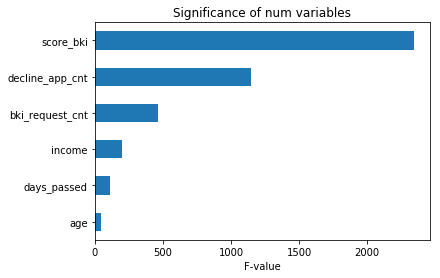

In [95]:
imp_num = Series(f_classif(train[num_cols], train['default'])[0], index = num_cols)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh')
plt.title('Significance of num variables')
plt.xlabel('F-value')

##### ВЫВОД:

Признак age не оказывает существенного влияния, как и предполагалось по боксплотам

## Значимость бинарных и категориальных переменных

Text(0.5, 1.0, 'Significance of bin variables')

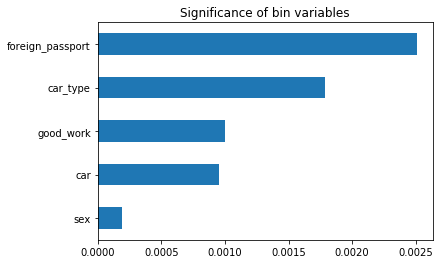

In [96]:
# Значимость бинарных признаков

imp_bin = Series(mutual_info_classif(train[bin_cols], train['default'],
                                     discrete_features =True), index = bin_cols)
imp_bin.sort_values(inplace = True)
imp_bin.plot(kind = 'barh')
plt.title('Significance of bin variables')

##### ВЫВОД:

Признак sex не оказывает существенного влияния на модель

In [97]:
education_dummy = pd.get_dummies(train['education'])
education_dummy.head()

,ACD,GRD,PGR,SCH,UGR
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,1,0,0,0


Text(0.5, 1.0, 'Significance of cat variables')

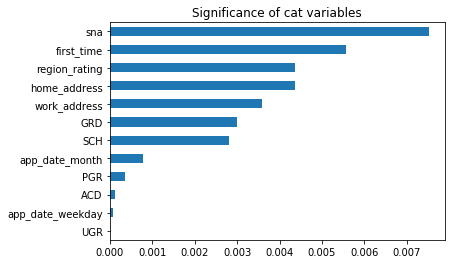

In [98]:
# Значимость категориальных признаков

#new_cat_cols = ['app_date_month', 'home_address', 'work_address', 'sna', 'first_time']
new_cat_cols = ['region_rating','home_address', 'work_address', 'sna', 'first_time', 'app_date_month', 'app_date_weekday']

imp_cat = pd.Series(mutual_info_classif(pd.concat([train[new_cat_cols], education_dummy], axis=1),
                                        train['default'], discrete_features =True),
                    index = pd.concat([train[new_cat_cols], education_dummy], axis=1).columns)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')
plt.title('Significance of cat variables')

##### ВЫВОД:

Вопреки моей ипотезе app_date_weekday имеет очень малый вес, этот признак почти бессмысленен.

EDUCATION оказался важным признаком, причем его значения GRD и SCH.

app_date_month тоже неплохо влияет

## Подготовка данных к машинному обучению

In [99]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2)

x_tr = poly.fit_transform(train[num_cols].values)
y_test = poly.fit_transform(test[num_cols].values)

Стандартизируем числовые переменные

In [100]:
# Scaling num variables

x_num = StandardScaler().fit_transform(x_tr)
y_num = StandardScaler().fit_transform(y_test)
print(x_num)
print(y_num)

[[ 0.          1.83955018 -0.42968867 ... -0.50036327 -0.70320021
   0.93505217]
 [ 0.          1.62747693 -0.42968867 ... -0.47870231 -0.66909779
  -0.27908159]
 [ 0.         -1.32073951  2.50154084 ... -0.24043177 -0.18318051
   0.93505217]
 ...
 [ 0.         -0.69641976 -0.42968867 ...  0.0844826   0.28818478
  -1.55547863]
 [ 0.         -0.89720818 -0.42968867 ... -0.60866806 -0.96278095
   1.80673795]
 [ 0.         -0.40701595 -0.42968867 ... -0.34873656 -0.38027696
   1.21523689]]
[[ 0.         -0.8893207  -0.42586914 ...  0.20922178  0.46803243
  -0.59902814]
 [ 0.          0.05662535  4.26849578 ... -0.81813846 -1.57034529
   1.18319733]
 [ 0.          0.96542659 -0.42586914 ... -0.24738277 -0.20813938
  -0.63029526]
 ...
 [ 0.         -0.68843368  2.54310793 ...  0.43752406  0.74859481
  -0.84916505]
 [ 0.         -1.0972628   1.67351468 ... -0.24738277 -0.17166259
   1.71473827]
 [ 0.         -0.03202919 -0.42586914 ... -0.58983618 -0.88600807
  -0.44269258]]


И объединим стандартизованные числовые, бинарные и закодированные категориальные переменные в одно признаковое пространство, разделив при этом признаки и целевую переменную.

In [101]:
# Merge

X = np.hstack([x_num, train[bin_cols].values, x_cat])
Y = train['default'].values

id_test = test.client_id
test = np.hstack([y_num, test[bin_cols].values, y_cat])

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42, shuffle = True)

## Регуляризация

In [103]:
from sklearn.model_selection import GridSearchCV

# Зададим ограничения для параметра регуляризации
C = np.logspace(0, 4, 10)

penalty = ['l1', 'l2']
hyperparameters = dict(C=C, penalty=penalty)
model = LogisticRegression()
model.fit(X_train, y_train)

clf = GridSearchCV(model, hyperparameters, cv=5, verbose=0)

best_model = clf.fit(X_train, y_train)

print('Лучший penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Лучшее C:', best_model.best_estimator_.get_params()['C'])

Лучший penalty: l2
Лучшее C: 7.742636826811269


Обучим модель

In [104]:
lgr = LogisticRegression(penalty = 'l2', C=7.742636826811269, max_iter=500)
lgr.fit(X_train, y_train)

LogisticRegression(C=7.742636826811269, max_iter=500)

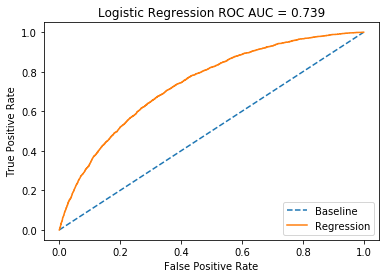

In [105]:
probs = lgr.predict_proba(X_test)
probs = probs[:,1]


fpr, tpr, threshold = roc_curve(y_test, probs)
roc_auc = roc_auc_score(y_test, probs)

plt.figure()
plt.plot([0, 1], label='Baseline', linestyle='--')
plt.plot(fpr, tpr, label = 'Regression')
plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

Обучим модель на всем датасете

In [106]:
lgr = LogisticRegression(penalty = 'l2', C=166.81005372000593, max_iter=500)
lgr.fit(X, Y)
probs = lgr.predict_proba(test)
probs = probs[:,1]

In [107]:
my_submission = pd.DataFrame({'client_id': id_test, 
                            'default': probs})
my_submission.to_csv('submission.csv', index=False)

my_submission

,client_id,default
0,74835,0.039772
1,17527,0.335968
2,75683,0.066930
3,26883,0.084542
4,28862,0.026126
5,99881,0.151462
6,26630,0.327792
7,79934,0.034992
8,16605,0.026208
9,105449,0.020102
